In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

from imblearn.over_sampling import SMOTE 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("Laptop Dataset.csv")

df1.head().T

,0,1,2,3,4
Taken_product,0,0,0,0,1
Yearly_avg_view_on_travel_page,379.0,255.0,250.0,295.0,250.0
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776.0,48725.0,35184.0,7572.0,39379.0
yearly_avg_Outstation_checkins,8.0,3.0,2.0,23.0,16.0
member_in_family,1,4,2,3,1
preferred_location_type,Beach,Beach,Beach,Beach,Beach
Yearly_avg_comment_on_travel_page,64.0,59.0,84.0,48.0,80.0
total_likes_on_outofstation_checkin_received,5142.0,2913.0,3074.0,9532.0,3926.0
week_since_last_outstation_checkin,1.0,1.0,0.0,0.0,1.0


In [3]:
df1.shape

(1108, 16)

In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken_product,1108.0,0.249097,0.432686,0.0,0.00,0.0,0.00,1.0
Yearly_avg_view_on_travel_page,1108.0,282.115523,64.199977,138.0,237.00,270.5,325.00,455.5
total_likes_on_outstation_checkin_given,1108.0,27769.664260,13361.837042,3818.0,17650.25,26942.5,39380.25,52512.0
yearly_avg_Outstation_checkins,1108.0,9.277978,8.409913,1.0,2.00,7.0,15.00,29.0
member_in_family,1108.0,2.895307,1.044561,1.0,2.00,3.0,4.00,5.0
Yearly_avg_comment_on_travel_page,1108.0,77.496390,21.039323,33.0,60.00,77.0,95.00,125.0
total_likes_on_outofstation_checkin_received,1108.0,6130.675090,4105.791059,1098.0,2884.00,4759.5,7979.50,16572.0
week_since_last_outstation_checkin,1108.0,2.998195,2.493351,0.0,1.00,2.0,4.00,11.0
following_company_page,1108.0,0.310469,0.462895,0.0,0.00,0.0,1.00,1.0
montly_avg_comment_on_company_page,1108.0,26.391697,6.167198,14.0,22.00,26.0,31.00,42.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   object 
 3   total_likes_on_outstation_checkin_given       1108 non-null   float64
 4   yearly_avg_Outstation_checkins                1108 non-null   float64
 5   member_in_family                              1108 non-null   int64  
 6   preferred_location_type                       1108 non-null   object 
 7   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 8   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 9   week_since_last_outstation_checkin            1108 non-null   f

In [6]:
df1.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [7]:
df1c=df1.copy()
df1c

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776.0,8.0,1,Beach,64.0,5142.0,1.0,0,33.0,1,4.0,0,10.0
1,0,255.0,Laptop,48725.0,3.0,4,Beach,59.0,2913.0,1.0,1,19.0,0,3.0,0,8.0
2,0,250.0,Laptop,35184.0,2.0,2,Beach,84.0,3074.0,0.0,0,23.0,0,3.0,0,8.0
3,0,295.0,Laptop,7572.0,23.0,3,Beach,48.0,9532.0,0.0,0,33.0,1,2.0,0,10.0
4,1,250.0,Laptop,39379.0,16.0,1,Beach,80.0,3926.0,1.0,1,33.0,1,2.0,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0,278.0,Laptop,24127.0,4.0,2,Beach,115.0,5184.0,7.0,0,35.0,0,2.0,1,23.0
1104,1,388.0,Laptop,30775.0,1.0,4,Beach,109.0,6787.0,8.0,0,29.0,0,4.0,1,14.0
1105,0,268.0,Laptop,42010.0,18.0,4,Beach,98.0,5753.0,2.0,1,34.0,0,4.0,1,17.0
1106,0,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616.0,4.0,0,36.0,0,3.0,0,23.0


In [8]:
df1c['preferred_location_type'].value_counts()

Beach              492
Historical site    344
Big Cities         108
Trekking            84
Other               56
Hill Stations       24
Name: preferred_location_type, dtype: int64

In [9]:
print('Feature: Preferred location type')
print(pd.Categorical(df1c['preferred_location_type'].unique()))
print(pd.Categorical(df1c['preferred_location_type'].unique()).codes)
df1c['preferred_location_type'] = pd.Categorical(df1c['preferred_location_type']).codes

Feature: Preferred location type
['Beach', 'Historical site', 'Big Cities', 'Trekking', 'Other', 'Hill Stations']
Categories (6, object): ['Beach', 'Big Cities', 'Hill Stations', 'Historical site', 'Other', 'Trekking']
[0 3 1 5 4 2]


In [10]:
df1c['preferred_location_type'].value_counts()

0    492
3    344
1    108
5     84
4     56
2     24
Name: preferred_location_type, dtype: int64

In [11]:
df_laptop = df1c.copy()

df_laptop.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776.0,8.0,1,0,64.0,5142.0,1.0,0,33.0,1,4.0,0,10.0
1,0,255.0,Laptop,48725.0,3.0,4,0,59.0,2913.0,1.0,1,19.0,0,3.0,0,8.0
2,0,250.0,Laptop,35184.0,2.0,2,0,84.0,3074.0,0.0,0,23.0,0,3.0,0,8.0
3,0,295.0,Laptop,7572.0,23.0,3,0,48.0,9532.0,0.0,0,33.0,1,2.0,0,10.0
4,1,250.0,Laptop,39379.0,16.0,1,0,80.0,3926.0,1.0,1,33.0,1,2.0,0,10.0


In [12]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   object 
 3   total_likes_on_outstation_checkin_given       1108 non-null   float64
 4   yearly_avg_Outstation_checkins                1108 non-null   float64
 5   member_in_family                              1108 non-null   int64  
 6   preferred_location_type                       1108 non-null   int8   
 7   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 8   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 9   week_since_last_outstation_checkin            1108 non-null   f

In [13]:
df_laptop.shape

(1108, 16)

In [14]:
from scipy.stats import zscore

In [15]:
df_laptop

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776.0,8.0,1,0,64.0,5142.0,1.0,0,33.0,1,4.0,0,10.0
1,0,255.0,Laptop,48725.0,3.0,4,0,59.0,2913.0,1.0,1,19.0,0,3.0,0,8.0
2,0,250.0,Laptop,35184.0,2.0,2,0,84.0,3074.0,0.0,0,23.0,0,3.0,0,8.0
3,0,295.0,Laptop,7572.0,23.0,3,0,48.0,9532.0,0.0,0,33.0,1,2.0,0,10.0
4,1,250.0,Laptop,39379.0,16.0,1,0,80.0,3926.0,1.0,1,33.0,1,2.0,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0,278.0,Laptop,24127.0,4.0,2,0,115.0,5184.0,7.0,0,35.0,0,2.0,1,23.0
1104,1,388.0,Laptop,30775.0,1.0,4,0,109.0,6787.0,8.0,0,29.0,0,4.0,1,14.0
1105,0,268.0,Laptop,42010.0,18.0,4,0,98.0,5753.0,2.0,1,34.0,0,4.0,1,17.0
1106,0,279.0,Laptop,30987.0,23.0,2,3,58.0,2616.0,4.0,0,36.0,0,3.0,0,23.0


In [16]:
df_laptop['preferred_device']=df_laptop['preferred_device'].replace({'Laptop':1})

In [17]:
df_laptop['preferred_device'].value_counts()

1    1108
Name: preferred_device, dtype: int64

In [18]:
X= df_laptop.drop(["Taken_product"],axis=1)

In [19]:
y=df_laptop.Taken_product

In [20]:
X.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,379.0,1,9776.0,8.0,1,0,64.0,5142.0,1.0,0,33.0,1,4.0,0,10.0
1,255.0,1,48725.0,3.0,4,0,59.0,2913.0,1.0,1,19.0,0,3.0,0,8.0
2,250.0,1,35184.0,2.0,2,0,84.0,3074.0,0.0,0,23.0,0,3.0,0,8.0
3,295.0,1,7572.0,23.0,3,0,48.0,9532.0,0.0,0,33.0,1,2.0,0,10.0
4,250.0,1,39379.0,16.0,1,0,80.0,3926.0,1.0,1,33.0,1,2.0,0,10.0


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Taken_product, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [23]:
X_train.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
667,328.0,1,20006.0,8.0,3,0,81.0,16572.0,2.0,0,26.0,0,2.0,0,33.0
737,281.0,1,21306.0,7.0,3,1,96.0,4691.0,3.0,0,35.0,0,4.0,0,21.0
820,246.0,1,26433.0,26.0,4,1,86.0,5685.0,3.0,1,32.0,0,3.0,0,17.0
385,365.0,1,25177.0,27.0,2,0,85.0,6404.0,4.0,1,24.0,0,4.0,0,8.0
785,370.0,1,24832.0,7.0,2,3,113.0,2718.0,4.0,1,23.0,0,3.0,1,26.0


In [24]:
y_train.head()

667    0
737    0
820    1
385    1
785    1
Name: Taken_product, dtype: int64

In [25]:
X_test.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
304,245.0,1,24120.0,9.0,2,3,47.0,4675.0,0.0,0,20.0,0,4.0,1,9.0
1072,297.0,1,20838.0,2.0,2,3,95.0,2538.0,5.0,0,22.0,0,2.0,0,16.0
126,202.0,1,44910.0,1.0,3,3,57.0,4304.0,1.0,0,24.0,0,2.0,0,7.0
976,267.0,1,21684.0,3.0,1,0,53.0,7818.0,1.0,0,26.0,0,3.0,0,14.0
236,239.0,1,5714.0,24.0,1,5,40.0,5245.0,2.0,0,30.0,1,4.0,0,9.0


In [26]:
y_test.head()

304     0
1072    0
126     0
976     0
236     0
Name: Taken_product, dtype: int64

In [27]:
X_train.shape

(775, 15)

In [28]:
y_train.shape

(775,)

In [29]:
X_test.shape

(333, 15)

In [30]:
y_test.shape

(333,)

### CART

In [31]:
from sklearn.tree import DecisionTreeClassifier #from scikit Learn

In [32]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [33]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [35]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.205873
total_likes_on_outofstation_checkin_received  0.147693
total_likes_on_outstation_checkin_given       0.144302
Yearly_avg_comment_on_travel_page             0.102315
yearly_avg_Outstation_checkins                0.085838
following_company_page                        0.059435
Daily_Avg_mins_spend_on_traveling_page        0.055071
week_since_last_outstation_checkin            0.045672
travelling_network_rating                     0.043006
preferred_location_type                       0.042229
working_flag                                  0.031309
montly_avg_comment_on_company_page            0.018508
member_in_family                              0.018067
Adult_flag                                    0.000683
preferred_device                              0.000000


In [36]:
y_predict = dt_model.predict(X_test)

In [37]:
y_predict.shape

(333,)

In [38]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [39]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [40]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [41]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [42]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


AUC: 1.000


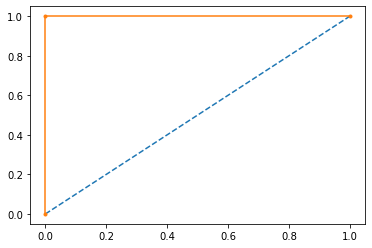

In [43]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.872


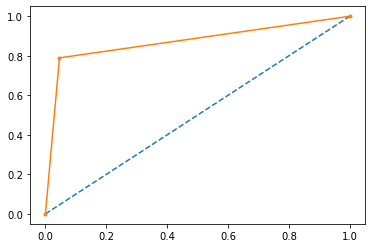

In [44]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

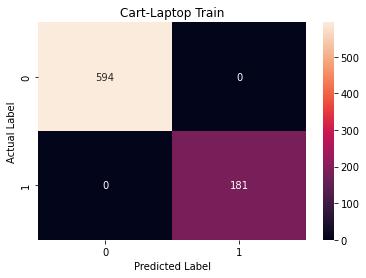

In [46]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Laptop Train')
plt.show()

In [47]:
#Train Data Accuracy
dt_model.score(X_train,y_train) 

1.0

In [48]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



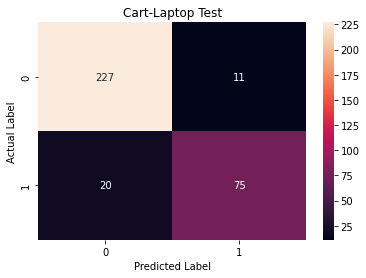

In [49]:
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Laptop Test')
plt.show()

In [50]:
#Test Data Accuracy
dt_model.score(X_test,y_test)

0.9069069069069069

In [51]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       238
           1       0.87      0.79      0.83        95

    accuracy                           0.91       333
   macro avg       0.90      0.87      0.88       333
weighted avg       0.91      0.91      0.91       333



#### Tuning

In [52]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [53]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [54]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.392451
total_likes_on_outofstation_checkin_received  0.292289
following_company_page                        0.157448
yearly_avg_Outstation_checkins                0.095914
member_in_family                              0.027941
total_likes_on_outstation_checkin_given       0.025798
Yearly_avg_comment_on_travel_page             0.008159
preferred_device                              0.000000
preferred_location_type                       0.000000
week_since_last_outstation_checkin            0.000000
montly_avg_comment_on_company_page            0.000000
working_flag                                  0.000000
travelling_network_rating                     0.000000
Adult_flag                                    0.000000
Daily_Avg_mins_spend_on_traveling_page        0.000000


In [55]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [56]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [57]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [58]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.84210526, 0.15789474],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.94366197, 0.05633803],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.76363636, 0.23636364],
       [0.52307692, 0.47692308],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.76363636, 0.23636364],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.36231884, 0.63768116],
       [0.76363636, 0.23636364],
       [0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [59]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.943662,0.056338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.703704,0.296296


AUC: 0.886


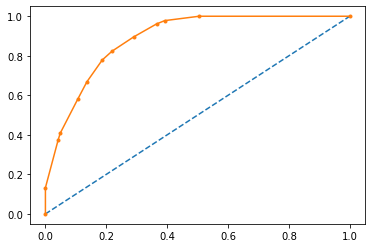

In [60]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.881


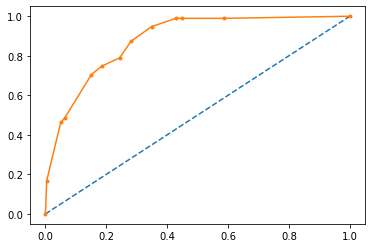

In [61]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

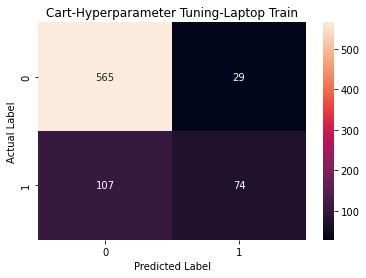

In [63]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Hyperparameter Tuning-Laptop Train')
plt.show()

In [64]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.824516129032258

In [65]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



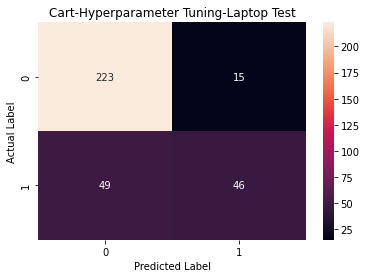

In [66]:
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Hyperparameter Tuning-Laptop Test')
plt.show()

In [67]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8078078078078078

In [68]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       238
           1       0.75      0.48      0.59        95

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



#### SMOTE

In [69]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [70]:
## Let's check the shape after SMOTE
X_train_res.shape

(1188, 15)

In [71]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [72]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [73]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [74]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [75]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.84210526, 0.15789474],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.94366197, 0.05633803],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.76363636, 0.23636364],
       [0.52307692, 0.47692308],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.76363636, 0.23636364],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.36231884, 0.63768116],
       [0.76363636, 0.23636364],
       [0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [76]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.943662,0.056338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.703704,0.296296


AUC: 0.886


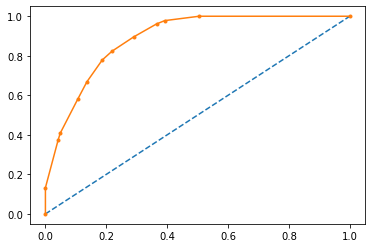

In [77]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.881


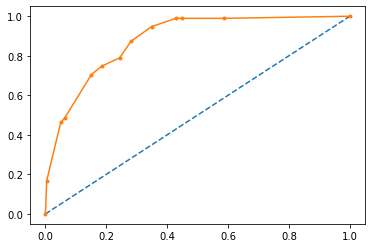

In [78]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

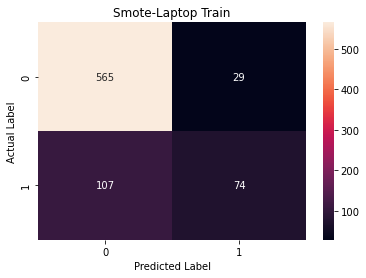

In [80]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Smote-Laptop Train')
plt.show()

In [81]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.824516129032258

In [82]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



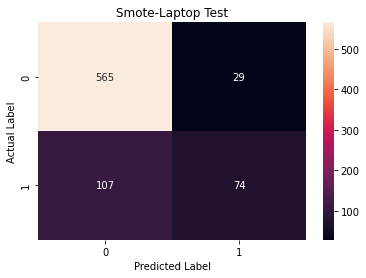

In [83]:
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Smote-Laptop Test')
plt.show()

In [84]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8078078078078078

In [85]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       238
           1       0.75      0.48      0.59        95

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



 ### Logistic Regression


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [88]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)

In [89]:
log_model.score(X_train,y_train)

0.7948387096774193

In [90]:
log_model.score(X_test,y_test)

0.7477477477477478

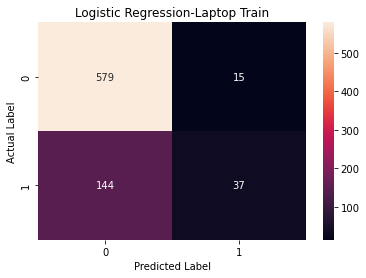

In [91]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Laptop Train')
plt.show()

In [92]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       594
           1       0.71      0.20      0.32       181

    accuracy                           0.79       775
   macro avg       0.76      0.59      0.60       775
weighted avg       0.78      0.79      0.75       775



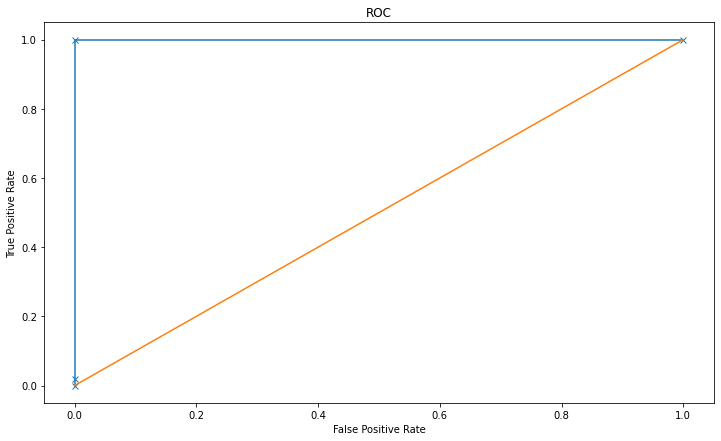

Area under Curve is 1.0


In [93]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

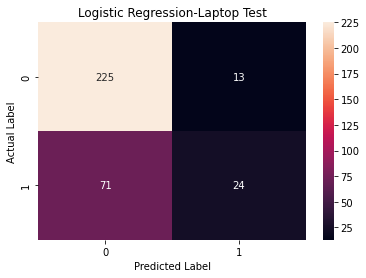

In [94]:
#Confusion Matrix for Train set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Laptop Test')
plt.show()

In [95]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       238
           1       0.65      0.25      0.36        95

    accuracy                           0.75       333
   macro avg       0.70      0.60      0.60       333
weighted avg       0.73      0.75      0.71       333



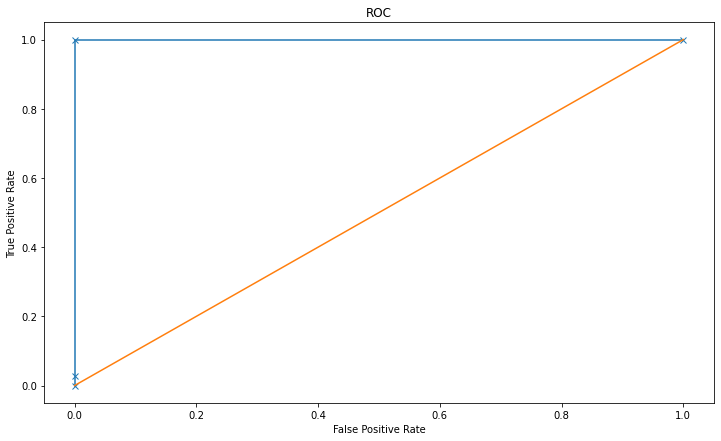

Area under Curve is 1.0


In [96]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

In [97]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'],
      'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'],
      'tol':[0.0001,0.00001]}

In [98]:
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')

In [99]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [100]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(solver='liblinear', tol=1e-05)


In [101]:
best_model1 = grid_search1.best_estimator_

In [102]:
# Prediction on the training set

log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)

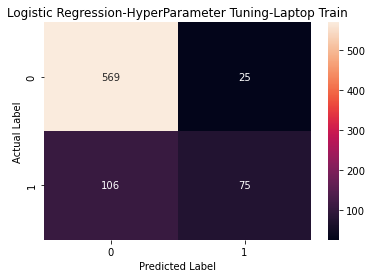

In [103]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-HyperParameter Tuning-Laptop Train')
plt.show()

In [104]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       594
           1       0.75      0.41      0.53       181

    accuracy                           0.83       775
   macro avg       0.80      0.69      0.72       775
weighted avg       0.82      0.83      0.81       775



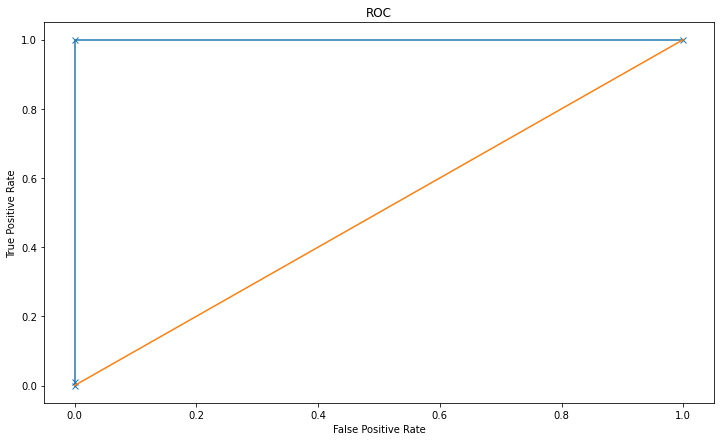

Area under Curve is 1.0


In [105]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,best_model1.predict_proba(X_train)[:,1]))

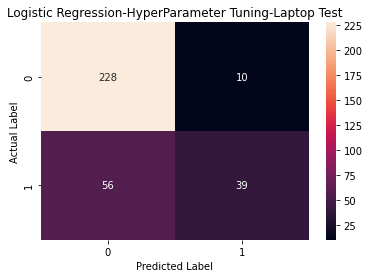

In [106]:
#Confusion Matrix for Test set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-HyperParameter Tuning-Laptop Test')
plt.show()

In [107]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       238
           1       0.80      0.41      0.54        95

    accuracy                           0.80       333
   macro avg       0.80      0.68      0.71       333
weighted avg       0.80      0.80      0.78       333



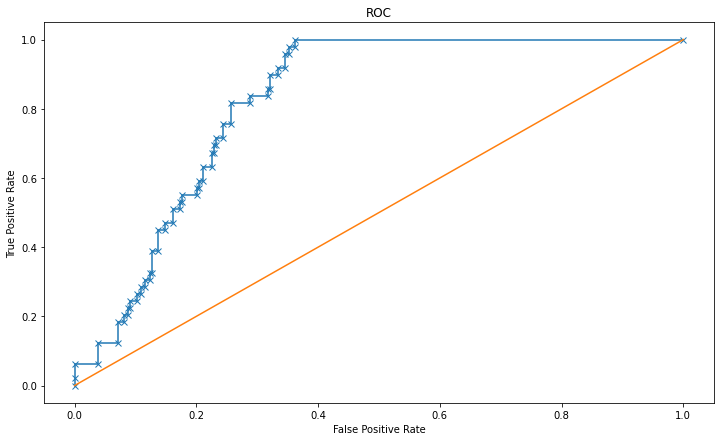

Area under Curve is 0.8237999425122161


In [108]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00430
Feature: 1, Score: -0.01045
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.05236
Feature: 4, Score: 0.00591
Feature: 5, Score: -0.10765
Feature: 6, Score: 0.01406
Feature: 7, Score: -0.00013
Feature: 8, Score: 0.19757
Feature: 9, Score: 1.50307
Feature: 10, Score: 0.02070
Feature: 11, Score: -0.11072
Feature: 12, Score: -0.32296
Feature: 13, Score: -0.11321
Feature: 14, Score: -0.07604


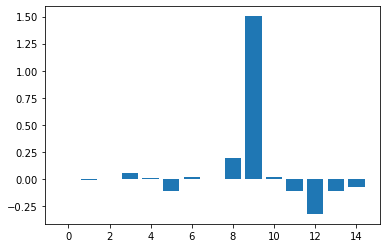

In [109]:
# get importance
importance = best_model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Linear Discriminant Analysis

In [110]:
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [111]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [112]:
lda_model.score(X_train,y_train)

0.8167741935483871

In [113]:
lda_model.score(X_test,y_test)

0.8048048048048048

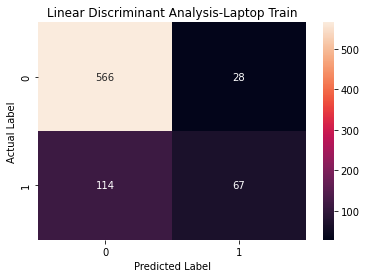

In [114]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Laptop Train')
plt.show()

In [115]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       594
           1       0.71      0.37      0.49       181

    accuracy                           0.82       775
   macro avg       0.77      0.66      0.69       775
weighted avg       0.80      0.82      0.79       775



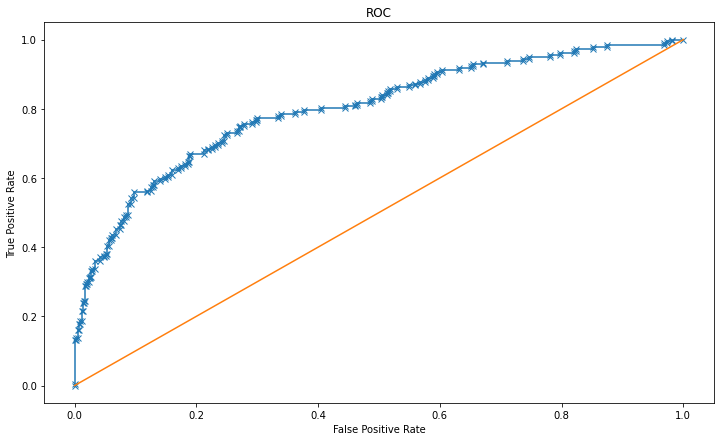

Area under Curve is 0.7991331361497107


In [116]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]))

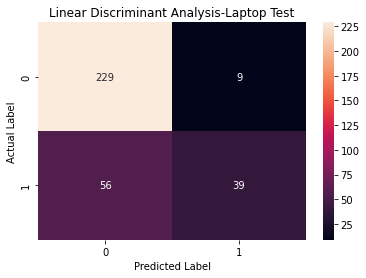

In [117]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Laptop Test')
plt.show()

In [118]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.80      0.96      0.88       238
           1       0.81      0.41      0.55        95

    accuracy                           0.80       333
   macro avg       0.81      0.69      0.71       333
weighted avg       0.81      0.80      0.78       333



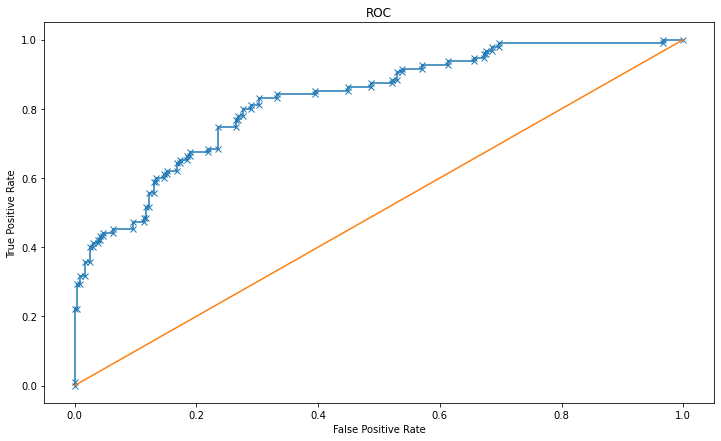

Area under Curve is 0.8264927023440954


In [119]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

In [120]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'],
          'shrinkage':['auto', 'float','none'],
          'tol':[0.001,0.0001,0.00001]}

In [121]:
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [122]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [123]:
lda_model.score(X_test,y_test)

0.8048048048048048

In [124]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [125]:
best_model2 = grid_search2.best_estimator_

In [126]:
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)

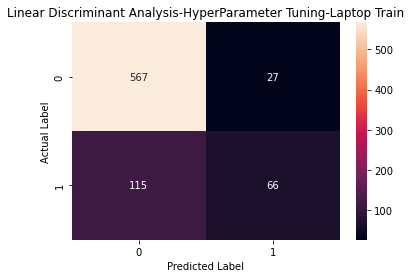

In [127]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-HyperParameter Tuning-Laptop Train')
plt.show()

In [128]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       594
           1       0.71      0.36      0.48       181

    accuracy                           0.82       775
   macro avg       0.77      0.66      0.69       775
weighted avg       0.80      0.82      0.79       775



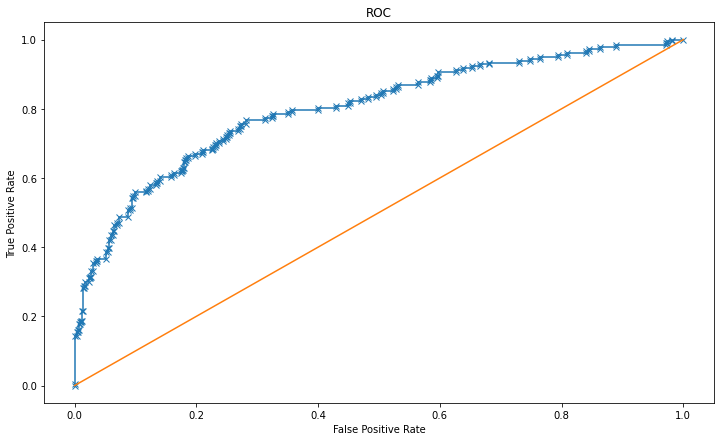

Area under Curve is 0.7994214706921889


In [129]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_model2.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_model2.predict_proba(X_train)[:,1]))

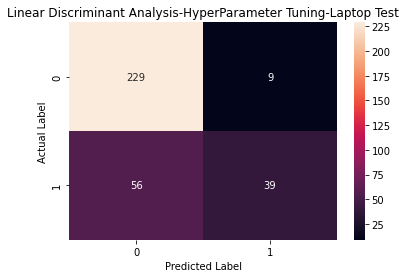

In [130]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-HyperParameter Tuning-Laptop Test')
plt.show()

In [131]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.80      0.96      0.88       238
           1       0.81      0.41      0.55        95

    accuracy                           0.80       333
   macro avg       0.81      0.69      0.71       333
weighted avg       0.81      0.80      0.78       333



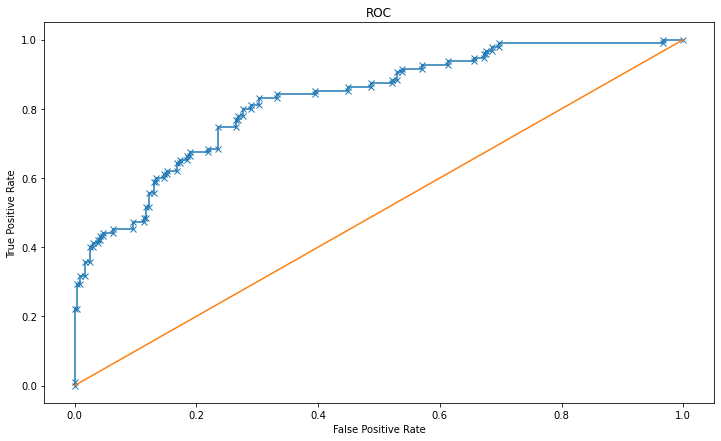

Area under Curve is 0.8264927023440954


In [132]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00435
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.04493
Feature: 4, Score: -0.01770
Feature: 5, Score: -0.10604
Feature: 6, Score: 0.01241
Feature: 7, Score: -0.00011
Feature: 8, Score: 0.18326
Feature: 9, Score: 1.72181
Feature: 10, Score: 0.02008
Feature: 11, Score: -0.01746
Feature: 12, Score: -0.26658
Feature: 13, Score: -0.30463
Feature: 14, Score: -0.06291


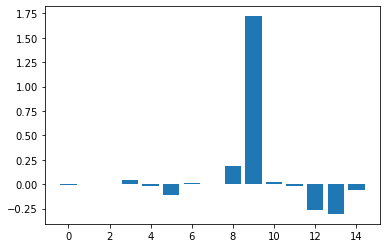

In [133]:
# get importance
importance = best_model2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

 ###  Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)

In [135]:
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [136]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)


0.9669669669669669


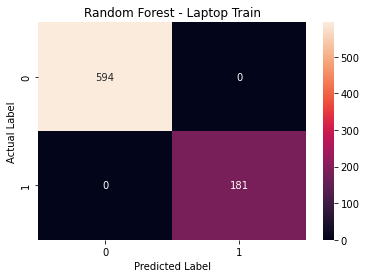

In [137]:
#Confusion Matrix for Train set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest - Laptop Train')
plt.show()

In [138]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



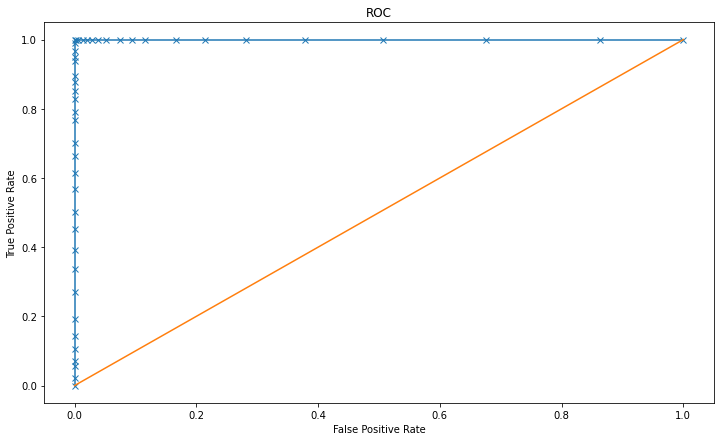

Area under Curve is 1.0


In [139]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]))

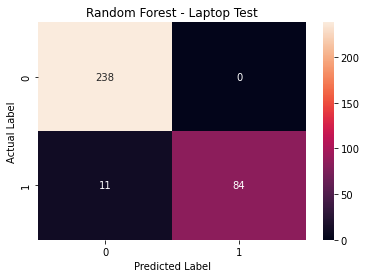

In [140]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest - Laptop Test')
plt.show()

In [141]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       238
           1       1.00      0.88      0.94        95

    accuracy                           0.97       333
   macro avg       0.98      0.94      0.96       333
weighted avg       0.97      0.97      0.97       333



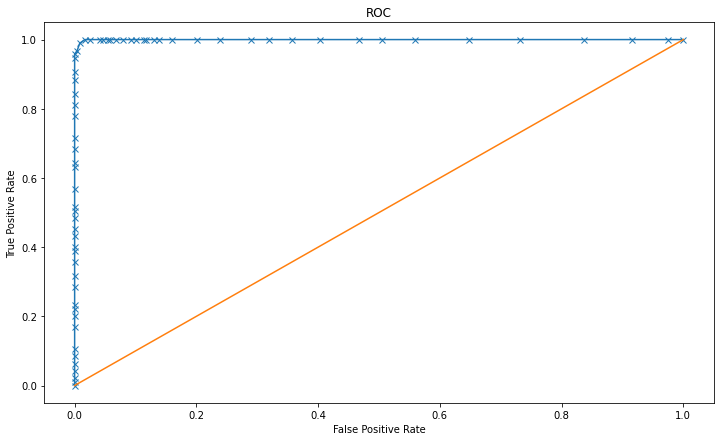

Area under Curve is 0.9997125165855815


In [142]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

In [143]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [144]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9669669669669669


### RF using grid search

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [147]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [148]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [149]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [150]:
best_grid = rf_random.best_estimator_

In [151]:
best_grid

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1400)

In [152]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)

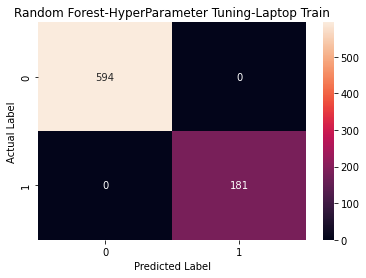

In [153]:
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-HyperParameter Tuning-Laptop Train')
plt.show()

In [154]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



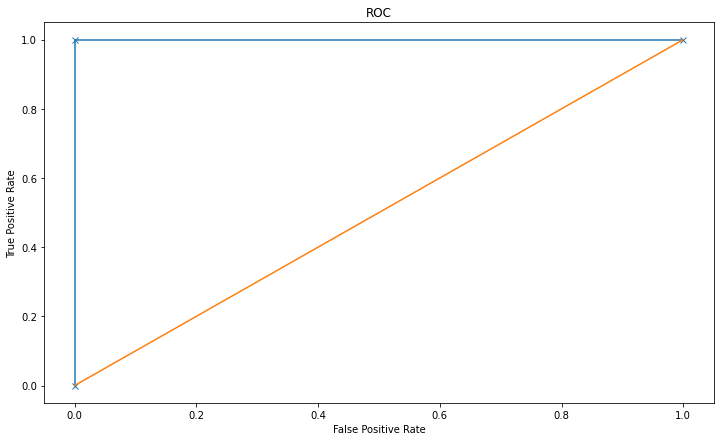

Area under Curve is 1.0


In [155]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

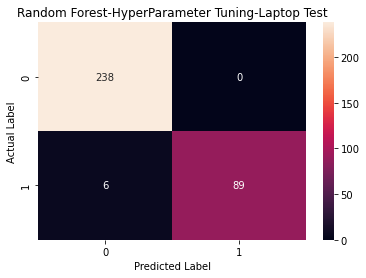

In [156]:
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-HyperParameter Tuning-Laptop Test')
plt.show()

In [157]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.94      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



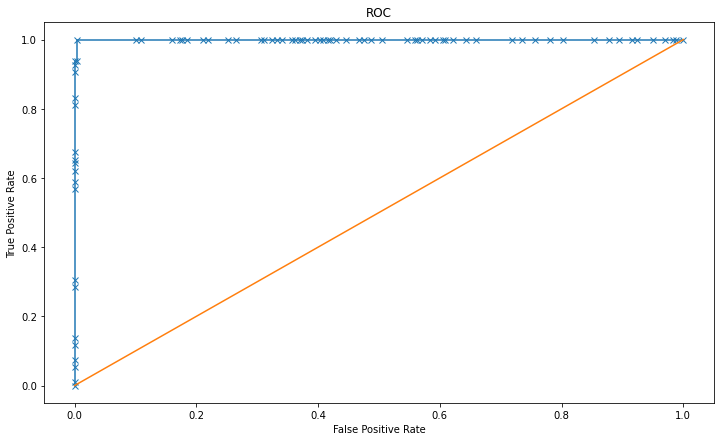

Area under Curve is 0.999734630694383


In [158]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.16536
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.13209
Feature: 3, Score: 0.10013
Feature: 4, Score: 0.04042
Feature: 5, Score: 0.04571
Feature: 6, Score: 0.06785
Feature: 7, Score: 0.16401
Feature: 8, Score: 0.04720
Feature: 9, Score: 0.05641
Feature: 10, Score: 0.03703
Feature: 11, Score: 0.01441
Feature: 12, Score: 0.04387
Feature: 13, Score: 0.01389
Feature: 14, Score: 0.07162


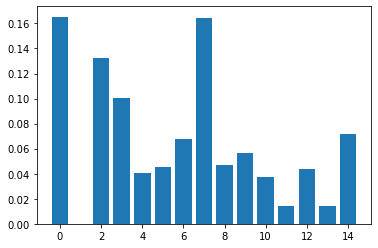

In [159]:
# get importance
importance = best_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### KNN

In [160]:
from sklearn.neighbors import KNeighborsClassifier


In [161]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    # evaluate test accuracy
    scores = KNN.score(X_test, y_test)
    ac_scores.append(scores)

# accuracy scores for 1,3,5,7....
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[1.0,
 0.954954954954955,
 0.8558558558558559,
 0.7867867867867868,
 0.7687687687687688,
 0.7327327327327328,
 0.7297297297297297,
 0.7357357357357357,
 0.7447447447447447,
 0.7507507507507507]

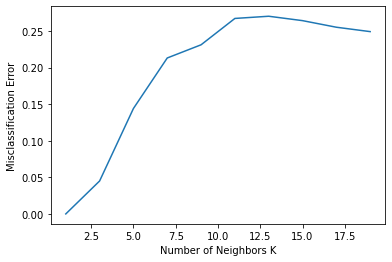

In [162]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### By scree plot we see 3 is optimum number of k neighbours with accordance MCE

##### Therefore, building the KNN model with k=3

In [163]:
#model score k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
KNN_train_predict = KNN_model.predict(X_train)

KNN_test_predict = KNN_model.predict(X_test)


In [164]:
KNN_model.score(X_train,y_train)

0.9935483870967742

In [165]:
KNN_model.score(X_test,y_test)

0.954954954954955

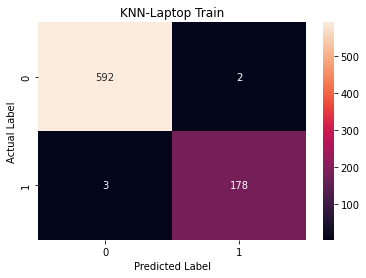

In [166]:
confusion_matrix(y_train,KNN_train_predict)
sns.heatmap(confusion_matrix(y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Laptop Train')
plt.show()

In [167]:
print(classification_report(y_train,KNN_train_predict)) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       594
           1       0.99      0.98      0.99       181

    accuracy                           0.99       775
   macro avg       0.99      0.99      0.99       775
weighted avg       0.99      0.99      0.99       775



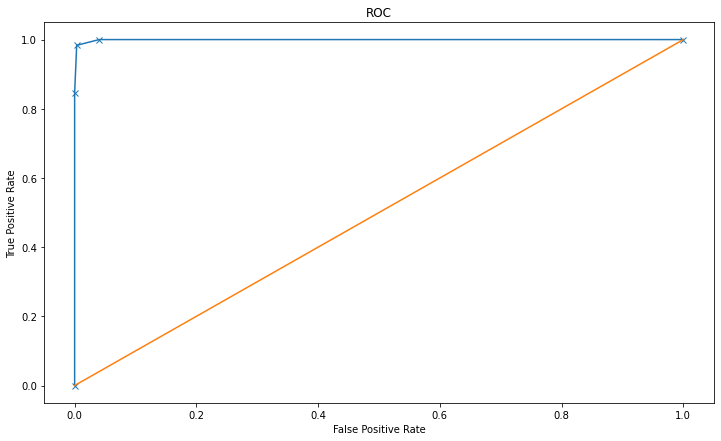

Area under Curve is 0.9994047286864967


In [168]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1]))

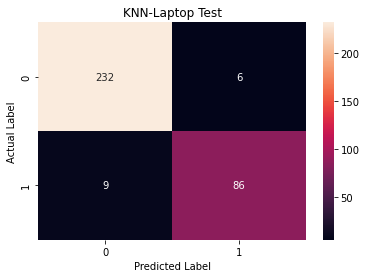

In [169]:
confusion_matrix(y_test,KNN_test_predict)
sns.heatmap(confusion_matrix(y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Laptop Test')
plt.show()

In [170]:
print(classification_report(y_test,KNN_test_predict)) 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       238
           1       0.93      0.91      0.92        95

    accuracy                           0.95       333
   macro avg       0.95      0.94      0.94       333
weighted avg       0.95      0.95      0.95       333



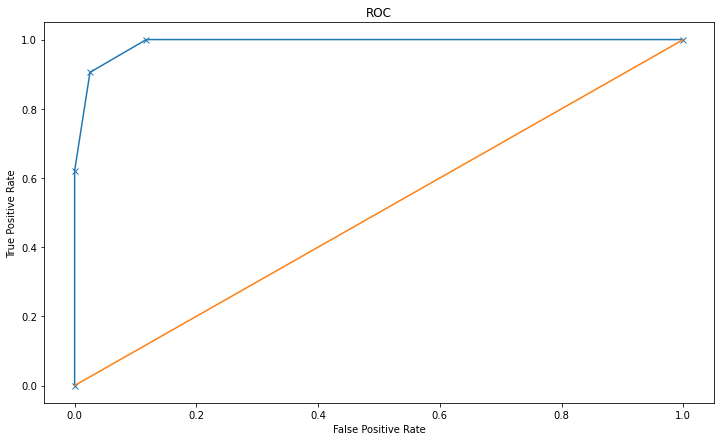

Area under Curve is 0.9896505970809376


In [171]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))

## Naive Bayes for laptop dataset

In [172]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [173]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [174]:
y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print(model_score)

0.8167741935483871


In [175]:
y_train_predict=NB_model.predict(X_train)
NB_model=NB_model.score(X_train,y_train)
print(NB_model)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))    

0.8167741935483871
[[548  46]
 [ 96  85]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       594
           1       0.65      0.47      0.54       181

    accuracy                           0.82       775
   macro avg       0.75      0.70      0.72       775
weighted avg       0.80      0.82      0.81       775



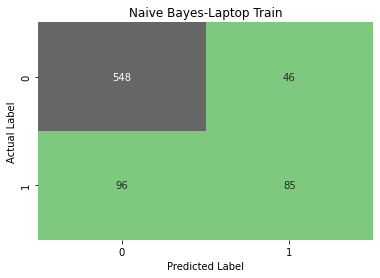

In [176]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes-Laptop Train')
plt.show()

In [177]:
NB_model=GaussianNB()
NB_model.fit(X_test, y_test)

GaussianNB()

In [178]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print(model_score)

0.7807807807807807


In [179]:
y_test_predict=NB_model.predict(X_test)
NB_model=NB_model.score(X_test,y_test)
print(NB_model)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))    

0.7807807807807807
[[193  45]
 [ 28  67]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       238
           1       0.60      0.71      0.65        95

    accuracy                           0.78       333
   macro avg       0.74      0.76      0.74       333
weighted avg       0.79      0.78      0.79       333



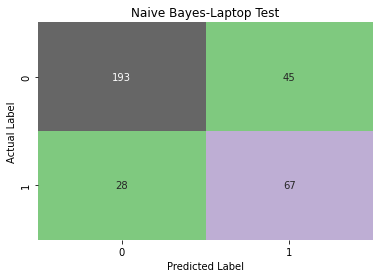

In [180]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes-Laptop Test')
plt.show()

# Ensemble techniques
## Bagging using hyperparameters for laptop dataset

In [181]:
from sklearn.ensemble import BaggingClassifier

In [182]:
bc = BaggingClassifier(base_estimator=rf, oob_score=True, random_state=1)

In [183]:
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}

In [184]:
# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 42}


In [185]:
rf = RandomForestClassifier(max_leaf_nodes=15, max_depth=6)                   
bc = BaggingClassifier(base_estimator=rf, n_estimators=42, random_state=1, oob_score=True)

In [186]:
bc.fit(X_train, y_train)
final_preds = bc.predict(X_test)

In [187]:
y_train_predict=bc.predict(X_train)
model_score=bc.score(X_train, y_train)
print(model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))  

0.8567741935483871
[[594   0]
 [111  70]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       594
           1       1.00      0.39      0.56       181

    accuracy                           0.86       775
   macro avg       0.92      0.69      0.74       775
weighted avg       0.88      0.86      0.83       775



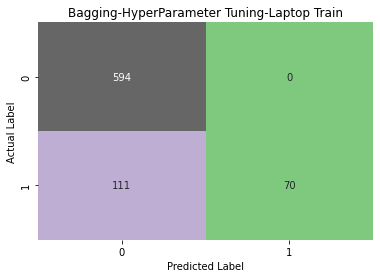

In [188]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-HyperParameter Tuning-Laptop Train')
plt.show()

In [189]:
y_test_predict=bc.predict(X_test)
model_score=bc.score(X_test, y_test)
print(model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))    

0.8378378378378378
[[238   0]
 [ 54  41]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       238
           1       1.00      0.43      0.60        95

    accuracy                           0.84       333
   macro avg       0.91      0.72      0.75       333
weighted avg       0.87      0.84      0.81       333



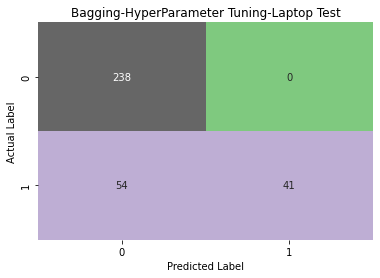

In [190]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-HyperParameter Tuning-Laptop Test')
plt.show()

## Bagging without grid search laptop dataset

In [191]:
rf=RandomForestClassifier()
Bagging_model=BaggingClassifier()

Bagging_model.fit(X_train,y_train)

BaggingClassifier()

In [192]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))  

0.9961290322580645
[[594   0]
 [  3 178]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       594
           1       1.00      0.98      0.99       181

    accuracy                           1.00       775
   macro avg       1.00      0.99      0.99       775
weighted avg       1.00      1.00      1.00       775



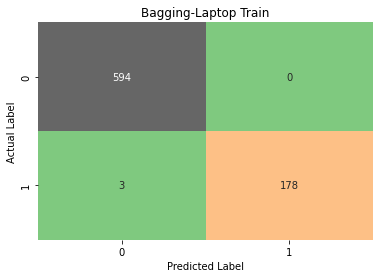

In [193]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-Laptop Train')
plt.show()

In [194]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))   

0.9579579579579579
[[238   0]
 [ 14  81]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       238
           1       1.00      0.85      0.92        95

    accuracy                           0.96       333
   macro avg       0.97      0.93      0.95       333
weighted avg       0.96      0.96      0.96       333



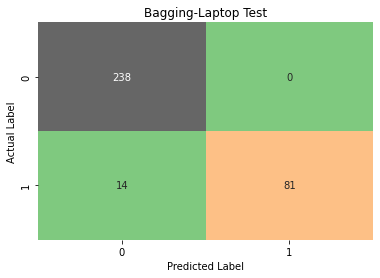

In [195]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-Laptop Test')
plt.show()

## ADA Boosting Model for laptop

In [196]:
from sklearn.ensemble import AdaBoostClassifier

In [197]:
ADB_model=AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [198]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))  

0.912258064516129
[[584  10]
 [ 58 123]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       594
           1       0.92      0.68      0.78       181

    accuracy                           0.91       775
   macro avg       0.92      0.83      0.86       775
weighted avg       0.91      0.91      0.91       775



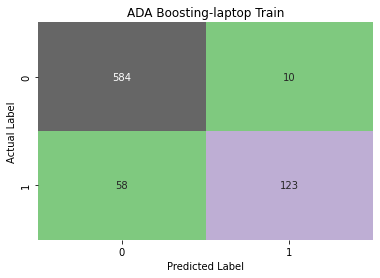

In [199]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('ADA Boosting-laptop Train')
plt.show()

In [200]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))    

0.8408408408408409
[[222  16]
 [ 37  58]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       238
           1       0.78      0.61      0.69        95

    accuracy                           0.84       333
   macro avg       0.82      0.77      0.79       333
weighted avg       0.84      0.84      0.83       333



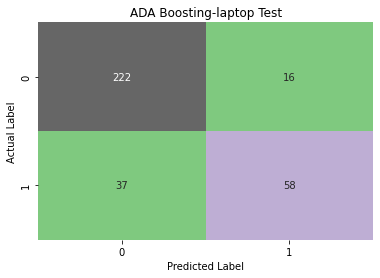

In [201]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('ADA Boosting-laptop Test')
plt.show()

## Gradient Boosting for laptop

In [202]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [203]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))  

0.9780645161290322
[[594   0]
 [ 17 164]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       594
           1       1.00      0.91      0.95       181

    accuracy                           0.98       775
   macro avg       0.99      0.95      0.97       775
weighted avg       0.98      0.98      0.98       775



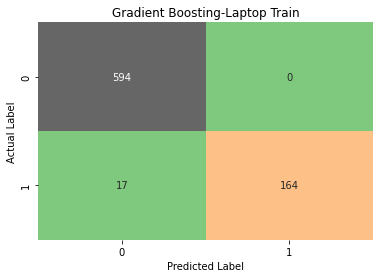

In [204]:
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Gradient Boosting-Laptop Train')
plt.show()

In [205]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, y_test)
print(gbc_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))    

0.93993993993994
[[236   2]
 [ 18  77]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       238
           1       0.97      0.81      0.89        95

    accuracy                           0.94       333
   macro avg       0.95      0.90      0.92       333
weighted avg       0.94      0.94      0.94       333



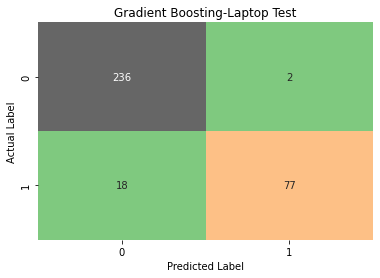

In [206]:
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Gradient Boosting-Laptop Test')
plt.show()

## Extreme Gradient Boosting Machine (XG-BOOST)

In [207]:
import xgboost as xgb

In [208]:
clfXGB=xgb.XGBClassifier()
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

1.0


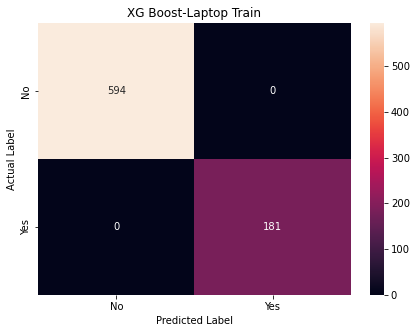

In [209]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-Laptop Train')
plt.show()

In [210]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

1.0
[[594   0]
 [  0 181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



0.987987987987988


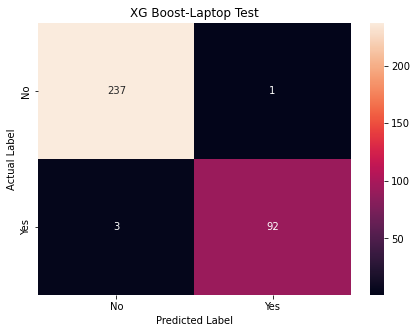

In [211]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-Laptop Test')
plt.show()

In [212]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=9 )
#clfXGB.fit(X_train, y_train)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.987987987987988
[[237   1]
 [  3  92]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       238
           1       0.99      0.97      0.98        95

    accuracy                           0.99       333
   macro avg       0.99      0.98      0.99       333
weighted avg       0.99      0.99      0.99       333



No handles with labels found to put in legend.


AUC: 1.000


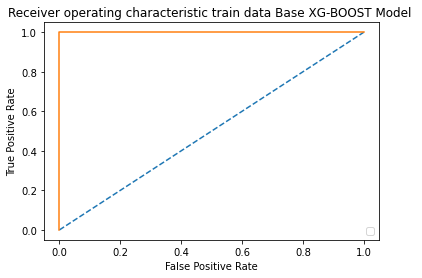

In [213]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

No handles with labels found to put in legend.


AUC: 0.999


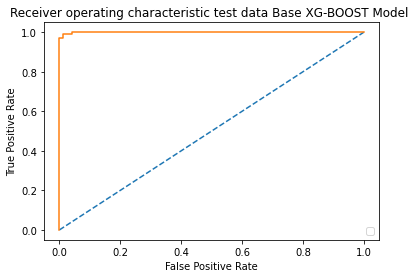

In [214]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

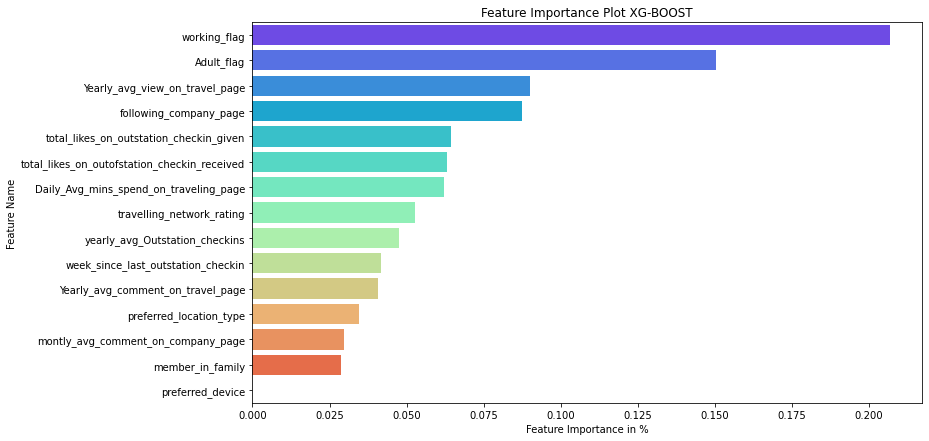

In [215]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG-BOOST')
plt.show()

## XG boost After hyperparameter Tune model 1

In [216]:
clfXGB=xgb.XGBClassifier(n_estimators=500,learning_rate=0.01,max_depth=5)
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

0.9883870967741936


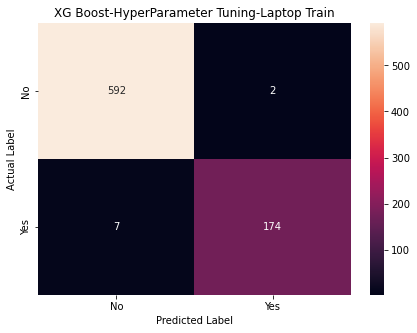

In [217]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-HyperParameter Tuning-Laptop Train')
plt.show()

In [218]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

0.9883870967741936
[[592   2]
 [  7 174]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       594
           1       0.99      0.96      0.97       181

    accuracy                           0.99       775
   macro avg       0.99      0.98      0.98       775
weighted avg       0.99      0.99      0.99       775



0.9519519519519519


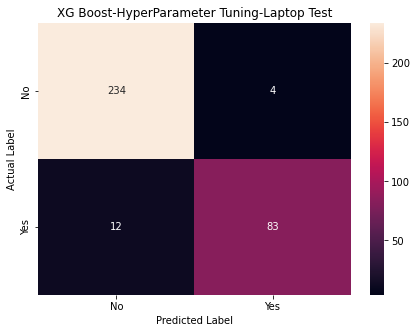

In [219]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-HyperParameter Tuning-Laptop Test')
plt.show()

In [220]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=9 )
#clfXGB.fit(X_train, y_train)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9519519519519519
[[234   4]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       238
           1       0.95      0.87      0.91        95

    accuracy                           0.95       333
   macro avg       0.95      0.93      0.94       333
weighted avg       0.95      0.95      0.95       333



No handles with labels found to put in legend.


AUC: 1.000


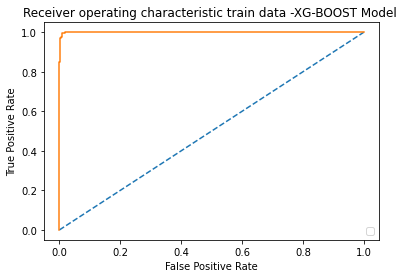

In [221]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XG-BOOST Model ')
plt.legend(loc="lower right")


No handles with labels found to put in legend.


AUC: 0.993


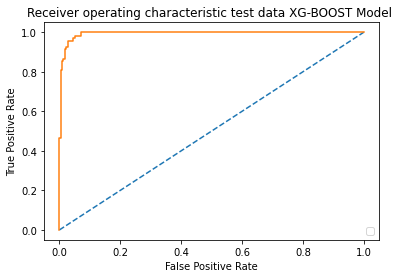

In [222]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

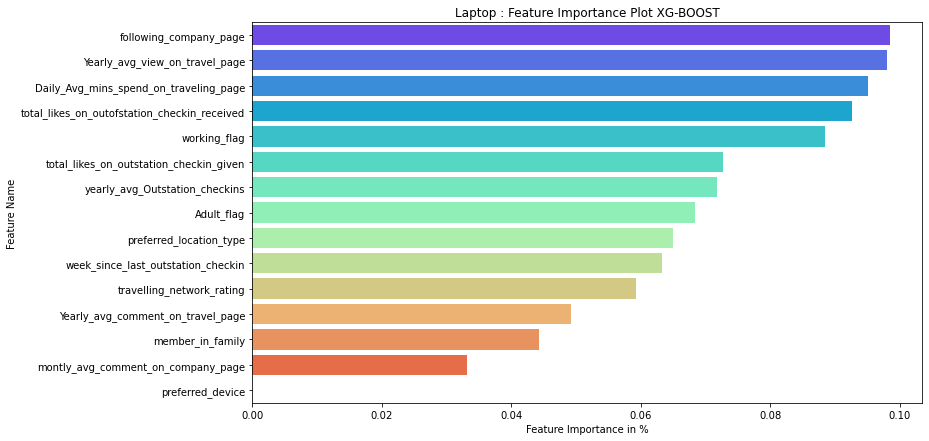

In [223]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Laptop : Feature Importance Plot XG-BOOST')
plt.show()

### SMOTE

In [224]:
from imblearn.over_sampling import SMOTE 
from sklearn import metrics


In [225]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [226]:
## Let's check the shape after SMOTE
X_train_res.shape

(1188, 15)

###  LOGIT

In [227]:
smote_log_model = LogisticRegression()
smote_log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [228]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
smote_log_test_predict = smote_log_model.predict(X_test)

In [229]:
## Performance Matrix on train data set with SMOTE
smote_log_train_predict = smote_log_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_log_train_predict))
print(metrics.classification_report(y_train_res ,smote_log_train_predict))

0.7011784511784511
[[392 202]
 [153 441]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       594
           1       0.69      0.74      0.71       594

    accuracy                           0.70      1188
   macro avg       0.70      0.70      0.70      1188
weighted avg       0.70      0.70      0.70      1188



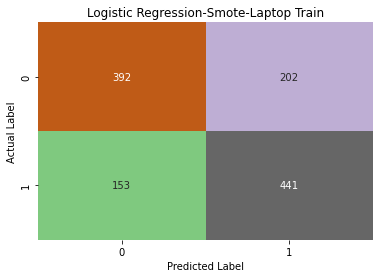

In [230]:
confusion_matrix(y_train_res, smote_log_train_predict)
sns.heatmap(confusion_matrix(y_train_res, smote_log_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Smote-Laptop Train')
plt.show()

In [231]:
smote_log_test_predict = smote_log_model.predict(X_test)
model_score = smote_log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.6816816816816816
[[153  85]
 [ 21  74]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       238
           1       0.47      0.78      0.58        95

    accuracy                           0.68       333
   macro avg       0.67      0.71      0.66       333
weighted avg       0.76      0.68      0.70       333



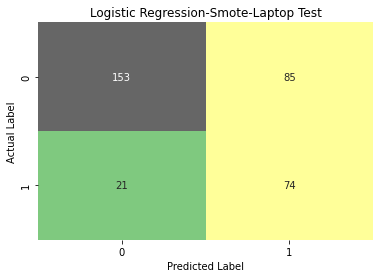

In [232]:
confusion_matrix(y_test, smote_log_test_predict)
sns.heatmap(confusion_matrix(y_test, smote_log_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Smote-Laptop Test')
plt.show()

###   LDA

In [233]:
smote_lda_model = LinearDiscriminantAnalysis()
smote_lda_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [234]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
smote_lda_test_predict = smote_lda_model.predict(X_test)

In [235]:
## Performance Matrix on train data set with SMOTE
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_lda_train_predict))
print(metrics.classification_report(y_train_res ,smote_lda_train_predict))

0.7011784511784511
[[440 154]
 [156 438]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       594
           1       0.74      0.74      0.74       594

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



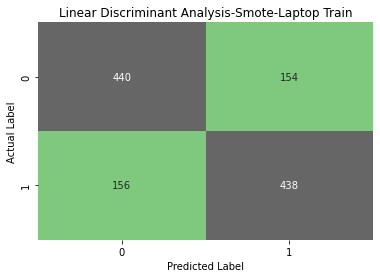

In [236]:
confusion_matrix(y_train_res, smote_lda_train_predict)
sns.heatmap(confusion_matrix(y_train_res, smote_lda_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Smote-Laptop Train')
plt.show()

In [237]:
smote_log_test_predict = smote_lda_model.predict(X_test)
model_score = smote_lda_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_lda_test_predict))
print(metrics.classification_report(y_test ,smote_lda_test_predict))

0.7237237237237237
[[168  70]
 [ 22  73]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       238
           1       0.51      0.77      0.61        95

    accuracy                           0.72       333
   macro avg       0.70      0.74      0.70       333
weighted avg       0.78      0.72      0.74       333



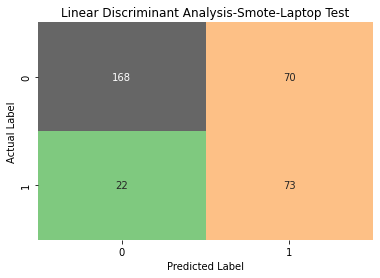

In [238]:
confusion_matrix(y_test, smote_lda_test_predict)
sns.heatmap(confusion_matrix(y_test, smote_lda_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Smote-Laptop Test')
plt.show()

###  KNN

In [239]:
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [240]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)

In [241]:
## Performance Matrix on train data set with SMOTE
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(y_train_res ,Smote_KNN_train_predict))

0.98989898989899
[[591   3]
 [  9 585]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       594
           1       0.99      0.98      0.99       594

    accuracy                           0.99      1188
   macro avg       0.99      0.99      0.99      1188
weighted avg       0.99      0.99      0.99      1188



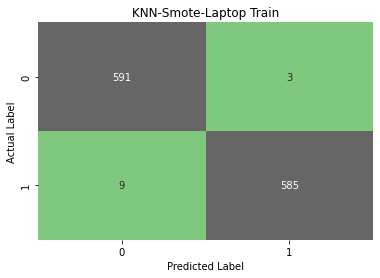

In [242]:
confusion_matrix(y_train_res, Smote_KNN_train_predict)
sns.heatmap(confusion_matrix(y_train_res, Smote_KNN_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Smote-Laptop Train')
plt.show()

In [243]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.972972972972973
[[229   9]
 [  0  95]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       238
           1       0.91      1.00      0.95        95

    accuracy                           0.97       333
   macro avg       0.96      0.98      0.97       333
weighted avg       0.98      0.97      0.97       333



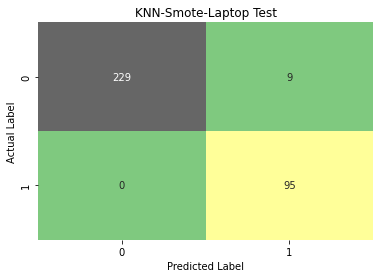

In [244]:
confusion_matrix(y_test, smote_log_test_predict)
sns.heatmap(confusion_matrix(y_test, smote_log_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Smote-Laptop Test')
plt.show()

###  RF


In [245]:
Smote_RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF_model=Smote_RF_model.fit(X_train_res, y_train_res)

In [246]:
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
Smote_RF_test_predict = Smote_RF_model.predict(X_test)

In [247]:
## Performance Matrix on train data set with SMOTE
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
model_score = Smote_RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(y_train_res ,Smote_RF_train_predict))

1.0
[[594   0]
 [  0 594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



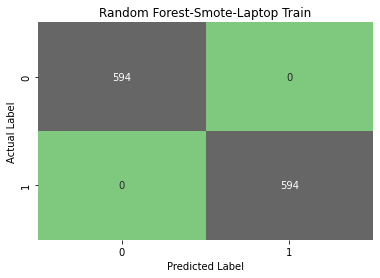

In [248]:
confusion_matrix(y_train_res, Smote_RF_train_predict)
sns.heatmap(confusion_matrix(y_train_res, Smote_RF_train_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-Smote-Laptop Train')
plt.show()

In [249]:
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
model_score = Smote_RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, Smote_RF_test_predict))
print(metrics.classification_report(y_test ,Smote_RF_test_predict))

0.984984984984985
[[237   1]
 [  4  91]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       0.99      0.96      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.98      0.98       333
weighted avg       0.99      0.98      0.98       333



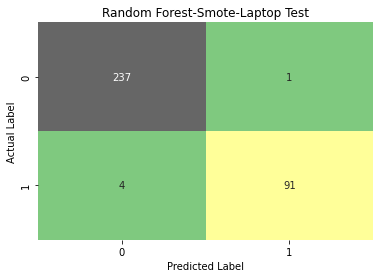

In [250]:
confusion_matrix(y_test, Smote_RF_test_predict)
sns.heatmap(confusion_matrix(y_test, Smote_RF_test_predict),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-Smote-Laptop Test')
plt.show()